In [2]:
import csv
import math
import random
import nltk
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import itertools
import collections
from collections import Counter
import nltk
from nltk.corpus import stopwords
import re
import networkx as nx
import warnings
from nltk import bigrams
from textblob import TextBlob
from pandas import DataFrame

In [2]:
import pandas as pd
cols = ['text']
df = pd.read_excel('D:\Amazon_reviews_195.xlsx',header = 0, names = cols)
df.head()

,text
0,I order 3 of them and one of the item is bad q...
1,Bulk is always the less expensive way to go fo...
2,Well they are not Duracell but for the price i...
3,Seem to work as well as name brand batteries a...
4,These batteries are very long lasting the pric...


In [3]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return '1'
    elif analysis.sentiment.polarity ==0:
        return '0'
    else:
        return '-1'

In [ ]:
# df['Text'] = df['text']
# df['Sentiment'] = df['Text'].apply(lambda x: analyze_sentiment(str(x)))        
# df1 = df[['Sentiment','text']]
# export_xlsx = df1.to_excel('D:/Amazon_review_pol_195.xlsx')

In [3]:
import pandas as pd
cols = ['sentiment','text']
df = pd.read_excel('D:\Amazon_review_pol_195.xlsx',header = None,names = cols)
df.head()
# import pandas as pd
# cols = ['sentiment','text']
# df1 = pd.read_excel('D:\Amazon_review_pol_195.xlsx',header = 0, names = cols)
# df1.head()

,sentiment,text
0,-1,I order 3 of them and one of the item is bad q...
1,-1,Bulk is always the less expensive way to go fo...
2,1,Well they are not Duracell but for the price i...
3,1,Seem to work as well as name brand batteries a...
4,1,These batteries are very long lasting the pric...


In [4]:
#Term Frequency
df1 = (df['text']).apply(lambda x: pd.value_counts(str(x).split(" "))).sum(axis = 0).reset_index()
df1.columns = ['words','tf']
df1.head()

,words,tf
0,of,8338.0
1,I,19762.0
2,the,25154.0
3,to,19324.0
4,aluminum,3.0


In [9]:
#Inverse Document Frequency
a = []
import numpy as np
for i,word in enumerate(df1['words']):
  if 'nan' in str(df1.loc[i, 'idf']):
      a.append(str(df1.loc[i, 'idf']))
  else:
      df1.loc[i, 'idf'] = np.log(df.shape[0]/(len(df[df['text'].str.contains(word, na=False)])))
df1.head()

,words,tf,idf
0,of,8338.0,1.487381
1,I,19762.0,NaN
2,the,25154.0,NaN
3,to,19324.0,NaN
4,aluminum,3.0,NaN


In [10]:
#Term Frequency – Inverse Document Frequency (TF-IDF)
df1['tfidf'] = df1['tf'] * df1['idf']
df1.head()

,words,tf,idf,tfidf
0,of,8338.0,1.487381,12401.786666
1,I,19762.0,NaN,NaN
2,the,25154.0,NaN,NaN
3,to,19324.0,NaN,NaN
4,aluminum,3.0,NaN,NaN


In [11]:
#to calculate number of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['text'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
df[['text','stopwords']].head()

,text,stopwords
0,I order 3 of them and one of the item is bad q...,13
1,Bulk is always the less expensive way to go fo...,5
2,Well they are not Duracell but for the price i...,8
3,Seem to work as well as name brand batteries a...,5
4,These batteries are very long lasting the pric...,4


In [12]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['texts'] = df['text'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
df['texts'].head()

0    I order 3 one item bad quality. Is missing bac...
1      Bulk always less expensive way go products like
2                           Well Duracell price happy.
3    Seem work well name brand batteries much bette...
4            These batteries long lasting price great.
Name: texts, dtype: object

In [13]:
#to calculate number of stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['texts'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
df[['texts','stopwords']].head()

,texts,stopwords
0,I order 3 one item bad quality. Is missing bac...,0
1,Bulk always less expensive way go products like,0
2,Well Duracell price happy.,0
3,Seem work well name brand batteries much bette...,0
4,These batteries long lasting price great.,0


In [14]:
documents = df['texts'][0:1270].to_string(index=False).split('\n')
documents[:12]

[' I order 3 one item bad quality. Is missing bac...',
 '   Bulk always less expensive way go products like',
 '                        Well Duracell price happy.',
 ' Seem work well name brand batteries much bette...',
 '         These batteries long lasting price great.',
 ' Bought lot batteries Christmas AmazonBasics Ce...',
 '      ive problame batteries ordered past pleased.',
 ' Well looking cheap non-rechargeable batteries ...',
 ' These hold amount high power juice like energi...',
 ' AmazonBasics AA AAA batteries done well appear...',
 ' I find amazon basics batteries equal superior ...',
 ' When I first started getting Amazon basic batt...']

In [15]:
#Model 1

In [16]:
import gensim
from gensim import corpora
from gensim import models
from gensim.corpora import Dictionary
from gensim.utils import simple_preprocess
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel,TfidfModel
from gensim.models.wrappers import LdaMallet
X = df.texts
y = df.sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, random_state = 750)
print("Train set has total {0} entries with {1:.2f}% negative, {2:.2f}% positive".format(len(X_train),(len(X_train[y_train == -1]) / (len(X_train)*1.))*100,(len(X_train[y_train == 1]) / (len(X_train)*1.))*100))

bigram = gensim.models.Phrases(X_train)
documents = df['texts'][0:1270].to_string(index=False).split('\n')
# Create the dictionary and corpus

mydict = Dictionary([simple_preprocess(words) for words in X_train])
corpus = [mydict.doc2bow(simple_preprocess(words)) for words in X_train]



Train set has total 19832 entries with 7.61% negative, 83.81% positive


In [19]:
lsimodel = LsiModel(corpus=corpus, num_topics=5, id2word=mydict)
lsimodel.print_topics(20,num_words=50)

[(0,
  '0.357*"batteries" + 0.317*"it" + 0.273*"tablet" + 0.262*"great" + 0.238*"amazon" + 0.218*"the" + 0.189*"use" + 0.166*"price" + 0.156*"good" + 0.128*"one" + 0.118*"this" + 0.114*"kindle" + 0.105*"like" + 0.103*"bought" + 0.102*"device" + 0.101*"apps" + 0.099*"screen" + 0.096*"battery" + 0.091*"love" + 0.088*"would" + 0.087*"long" + 0.087*"they" + 0.087*"easy" + 0.086*"last" + 0.085*"get" + 0.084*"time" + 0.081*"fire" + 0.080*"well" + 0.077*"buy" + 0.075*"kids" + 0.070*"also" + 0.068*"you" + 0.067*"work" + 0.064*"these" + 0.063*"much" + 0.062*"my" + 0.061*"store" + 0.060*"old" + 0.059*"year" + 0.056*"better" + 0.056*"books" + 0.055*"games" + 0.054*"that" + 0.053*"ve" + 0.053*"if" + 0.053*"brand" + 0.052*"app" + 0.052*"really" + 0.052*"play" + 0.051*"product"'),
 (1,
  '-0.736*"batteries" + 0.309*"tablet" + 0.294*"it" + -0.135*"last" + -0.107*"long" + 0.106*"kindle" + 0.106*"apps" + -0.104*"these" + 0.098*"screen" + -0.097*"brand" + 0.095*"the" + -0.086*"they" + 0.086*"device" + 0

In [ ]:
lsimodel.show_topics(num_topics=10)  # Showing only the top 5 topics

In [ ]:
lsitopics = lsimodel.show_topics(formatted=False)

In [21]:
ldamodel = LdaModel(corpus=corpus, num_topics=5, id2word=mydict)
ldamodel.print_topics(20,num_words=50)

[(0,
  '0.046*"batteries" + 0.011*"battery" + 0.010*"work" + 0.010*"amazon" + 0.009*"last" + 0.009*"these" + 0.009*"they" + 0.009*"buy" + 0.009*"good" + 0.009*"use" + 0.008*"well" + 0.008*"far" + 0.008*"time" + 0.007*"long" + 0.007*"used" + 0.007*"ve" + 0.007*"duracell" + 0.007*"so" + 0.007*"one" + 0.006*"the" + 0.006*"box" + 0.006*"would" + 0.006*"them" + 0.006*"like" + 0.005*"bought" + 0.005*"life" + 0.005*"great" + 0.004*"it" + 0.004*"need" + 0.004*"get" + 0.004*"aa" + 0.004*"lasted" + 0.004*"aaa" + 0.004*"brand" + 0.004*"again" + 0.004*"know" + 0.004*"energizer" + 0.004*"buying" + 0.004*"seem" + 0.003*"remote" + 0.003*"put" + 0.003*"pack" + 0.003*"much" + 0.003*"two" + 0.003*"go" + 0.003*"using" + 0.003*"less" + 0.003*"every" + 0.003*"power" + 0.003*"keep"'),
 (1,
  '0.016*"tablet" + 0.016*"the" + 0.012*"this" + 0.011*"it" + 0.010*"great" + 0.008*"best" + 0.007*"get" + 0.007*"perfect" + 0.006*"like" + 0.005*"charge" + 0.005*"case" + 0.005*"ipad" + 0.005*"buy" + 0.005*"need" + 0.005

In [25]:
from gensim.models import CoherenceModel

coherence_score_lda = CoherenceModel(model=ldamodel, texts= [X_train], dictionary=mydict, coherence='c_v')
coherence_score = coherence_score_lda.get_coherence()

print('\nCoherence Score:', coherence_score)

C:\Users\raghu\Anaconda3\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:204: RuntimeWarning: divide by zero encountered in double_scalars
  m_lr_i = np.log(numerator / denominator)
C:\Users\raghu\Anaconda3\lib\site-packages\gensim\topic_coherence\indirect_confirmation_measure.py:323: RuntimeWarning: invalid value encountered in true_divide
  return cv1.T.dot(cv2)[0, 0] / (_magnitude(cv1) * _magnitude(cv2))



Coherence Score: nan


In [22]:
def evaluate_graph(dictionary, corpus, texts, limit):
    """
    Function to display num_topics - LDA graph using c_v coherence
    
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : topic limit
    
    Returns:
    -------
    lm_list : List of LDA topic models
    c_v : Coherence values corresponding to the LDA model with respective number of topics
    """
    c_v = []
    lm_list = []
    for num_topics in range(1, limit):
        lm = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        lm_list.append(lm)
        cm = CoherenceModel(model=lm, texts=texts, dictionary=dictionary, coherence='c_v')
        c_v.append(cm.get_coherence())
        
    # Show graph
    x = range(1, limit)
    plt.plot(x, c_v)
    plt.xlabel("num_topics")
    plt.ylabel("Coherence score")
    plt.legend(("c_v"), loc='best')
    plt.show()
    
    return lm_list, c_v

In [ ]:
print(corpus)

In [26]:
import pyLDAvis.gensim

In [27]:
pyLDAvis.enable_notebook()

In [28]:
pyLDAvis.gensim.prepare(ldamodel, corpus, mydict)

C:\Users\raghu\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.176551 -0.020206       1        1  32.573135
0     -0.141763  0.097576       2        1  19.488285
4      0.068346 -0.122271       3        1  18.211483
2     -0.204193 -0.069513       4        1  17.035212
1      0.101059  0.114414       5        1  12.691881, topic_info=     Category         Freq       Term        Total  loglift  logprob
3     Default  5605.000000  batteries  5605.000000  30.0000  30.0000
37    Default  3496.000000      price  3496.000000  29.0000  29.0000
32    Default  6407.000000      great  6407.000000  28.0000  28.0000
31    Default  4044.000000       good  4044.000000  27.0000  27.0000
103   Default  4499.000000     tablet  4499.000000  26.0000  26.0000
12    Default  1581.000000       last  1581.000000  25.0000  25.0000
13    Default  1662.000000       long  1662.000000  24.0000  24.0000
159   Default  1474.000000      loves  1474.000000  23.0000  23.0000
67    Default  4845.000000         it  4845.000000  22.0000  22.0000
87    Default  1651.000000       work  1651.000000  21.0000  21.0000
185   Default   964.000000      brand   964.000000  20.0000  20.0000
157   Default  2029.000000       easy  2029.000000  19.0000  19.0000
188   Default   825.000000       name   825.000000  18.0000  18.0000
151   Default  1422.000000        old  1422.000000  17.0000  17.0000
20    Default  1108.000000      these  1108.000000  16.0000  16.0000
113   Default  1378.000000         my  1378.000000  15.0000  15.0000
211   Default  1535.000000       they  1535.000000  14.0000  14.0000
189   Default   789.000000      value   789.000000  13.0000  13.0000
118   Default  2102.000000       this  2102.000000  12.0000  12.0000
161   Default  1902.000000     kindle  1902.000000  11.0000  11.0000
256   Default  1451.000000       fire  1451.000000  10.0000  10.0000
184   Default   959.000000    quality   959.000000   9.0000   9.0000
192   Default   574.000000     brands   574.000000   8.0000   8.0000
27    Default  1233.000000       year  1233.000000   7.0000   7.0000
364   Default   590.000000       seem   590.000000   6.0000   6.0000
182   Default   593.000000       ipad   593.000000   5.0000   5.0000
154   Default   758.000000        she   758.000000   4.0000   4.0000
109   Default   995.000000     screen   995.000000   3.0000   3.0000
8     Default   402.000000   duracell   402.000000   2.0000   2.0000
64    Default  1129.000000      games  1129.000000   1.0000   1.0000
...       ...          ...        ...          ...      ...      ...
638    Topic5   142.422134       item   272.206177   1.4164  -5.5379
1683   Topic5    82.587852    service   125.138260   1.6487  -6.0828
82     Topic5   576.474365        the  2688.807861   0.5243  -4.1397
45     Topic5   290.909180       best   969.550049   0.8604  -4.8237
425    Topic5   192.176071       case   516.547424   1.0755  -5.2383
382    Topic5   245.003448    perfect   811.983765   0.8660  -4.9954
118    Topic5   416.570618       this  2102.215332   0.4455  -4.4646
103    Topic5   593.837769     tablet  4499.571289   0.0391  -4.1101
182    Topic5   185.932648       ipad   593.694885   0.9032  -5.2713
546    Topic5   134.092804      there   337.548187   1.1410  -5.5981
171    Topic5   255.722931        get  1306.746704   0.4330  -4.9526
376    Topic5   147.002121      could   417.695251   1.0199  -5.5062
235    Topic5   180.692642       need   698.333313   0.7123  -5.2999
428    Topic5   153.961243      first   495.726898   0.8949  -5.4600
67     Topic5   390.464783         it  4845.721680  -0.4543  -4.5293
786    Topic5   142.475250       that   445.378815   0.9245  -5.5375
97     Topic5   155.096695     little   664.821838   0.6087  -5.4526
32     Topic5   350.051910      great  6407.333984  -0.8429  -4.6386
142    Topic5   214.660507       like  1643.419800   0.0287  -5.1276
116    Topic5   169.587845       read   900.399841   0.3947 

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
def build_lda(X_train, num_topics=50):
    vec = CountVectorizer()
    transformed_X_train = vec.fit_transform(X_train)
    feature_names = vec.get_feature_names()
    lda = LatentDirichletAllocation(
        n_components=num_topics, max_iter=5, 
        learning_method='online', random_state=0)
    lda.fit(transformed_X_train)
    return lda, vec, feature_names

def display_word_distribution(model, feature_names, n_word):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        words = []
        for i in topic.argsort()[:-n_word - 1:-1]:
            words.append(feature_names[i])
        print(words)
lda_model, vec, feature_names = build_lda(X_train)
display_word_distribution(
    model=lda_model, feature_names=feature_names, 
    n_word=100)

Topic 0:
['all', 'promised', 'links', 'superb', '89', 'department', 'burned', 'nope', 'echos', 'distracted', 'sounding', 'recycling', 'rain', 'supplies', 'semester', 'representative', 'constructed', 'downsides', 'suddenly', 'reserve', 'regardless', 'carrier', 'schools', 'smarter', 'beeps', 'ixl', 'toothbrushes', 'pulled', 'dissapointed', '9400', 'warranties', 'goodnight', 'ninja', 'mwh', 'extrapolating', 'calculations', 'brutal', 'mines', 'goto', 'coop', 'chicken', 'yokod', 'iceland', 'slr', 'they', 'prepaid', 'transactions', 'whereas', 'androids', 'lightest', 'tangy', 'last', 'astounding', 'atlantic', 'ergonomical', 'tsa', 'wine', 'dependent', 'happening', 'tix', 'goings', 'bite', 'buy', 'sodoko', 'matthew', 'northern', 'sim', 'pounds', 'these', 'as', 'hotels', 'facing', 'postage', 'political', 'coppertops', 'subscribed', 'reservations', 'opener', 'wound', 'investing', 'aftertaste', 'sligtly', 'crashed', 'flavors', 'gig', 'recyclable', 'solitare', 'essentially', 'screening', 'ion', 'b

In [30]:
from gensim.models import CoherenceModel
coherence_score_lda = CoherenceModel(model = ldamodel, texts = X_train, dictionary = mydict, coherence = 'c_v')
coherence_score = coherence_score_lda.get_coherence()
print('\nCoherence Score:',coherence_score)

C:\Users\raghu\Anaconda3\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:202: RuntimeWarning: invalid value encountered in true_divide
  numerator = (co_occur_count / num_docs) + EPSILON
C:\Users\raghu\Anaconda3\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:203: RuntimeWarning: invalid value encountered in true_divide
  denominator = (w_prime_count / num_docs) * (w_star_count / num_docs)
C:\Users\raghu\Anaconda3\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:198: RuntimeWarning: invalid value encountered in true_divide
  co_doc_prob = co_occur_count / num_docs



Coherence Score: nan


In [ ]:
#Model 2

In [34]:
mydict = corpora.Dictionary([simple_preprocess(words) for words in X_train])
corpus = [mydict.doc2bow(simple_preprocess(words)) for words in X_train]

from gensim import corpora, models
tfidf = models.TfidfModel(corpus=corpus, id2word= None, 
                          dictionary=None,normalize=True, smartirs= 'npc', 
                          pivot=None, slope=0.25)
corpus_tfidf1 = tfidf[corpus]
from pprint import pprint
for doc in corpus_tfidf1:
    pprint(doc)
    break

[(0, 0.19970178233010463),
 (1, 0.26687684685813656),
 (2, 0.08073625285793304),
 (3, 0.16681664999876009),
 (4, 0.09834470340093705),
 (5, 0.21216834753400046),
 (6, 0.21563416644788916),
 (7, 0.1746155485630026),
 (8, 0.3032741362643697),
 (9, 0.16886857080052584),
 (10, 0.18739267161402384),
 (11, 0.3134826020943127),
 (12, 0.09587506499192101),
 (13, 0.09154983292595137),
 (14, 0.2818499471976014),
 (15, 0.14792881054960416),
 (16, 0.17130190206191045),
 (17, 0.17647786426137213),
 (18, 0.20004763336126496),
 (19, 0.14147791976596064),
 (20, 0.10974998456968431),
 (21, 0.17724808346020035),
 (22, 0.18972457718395525),
 (23, 0.1876450416283891),
 (24, 0.19935896109919485),
 (25, 0.2298481754039956),
 (26, 0.10295682128559559),
 (27, 0.10831906537353789)]


In [35]:
lda_model = gensim.models.LdaMulticore(corpus = corpus_tfidf1, num_topics=10, id2word=mydict, passes=2, workers=2)

In [36]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.016*"deal" + 0.009*"it" + 0.008*"tablet" + 0.008*"bought" + 0.008*"great" + 0.008*"loves" + 0.007*"son" + 0.007*"good" + 0.007*"grandson" + 0.007*"use"
Topic: 1 
Words: 0.011*"nice" + 0.008*"easy" + 0.008*"quality" + 0.007*"advertised" + 0.007*"tablet" + 0.006*"it" + 0.006*"use" + 0.006*"good" + 0.006*"batteries" + 0.006*"great"
Topic: 2 
Words: 0.032*"good" + 0.021*"price" + 0.020*"product" + 0.020*"batteries" + 0.013*"excellent" + 0.013*"great" + 0.007*"buy" + 0.007*"work" + 0.006*"it" + 0.005*"perfect"
Topic: 3 
Words: 0.034*"great" + 0.030*"value" + 0.017*"price" + 0.011*"ok" + 0.010*"good" + 0.007*"buy" + 0.007*"very" + 0.007*"tablet" + 0.007*"it" + 0.006*"easy"
Topic: 4 
Words: 0.012*"batteries" + 0.010*"expected" + 0.008*"they" + 0.008*"buy" + 0.008*"again" + 0.006*"work" + 0.006*"these" + 0.006*"will" + 0.005*"cheap" + 0.005*"great"
Topic: 5 
Words: 0.029*"batteries" + 0.024*"long" + 0.024*"last" + 0.015*"good" + 0.015*"name" + 0.014*"far" + 0.014*"price" + 0

In [37]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf1, num_topics=10, id2word=mydict, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.026*"great" + 0.025*"price" + 0.023*"batteries" + 0.016*"deal" + 0.014*"work" + 0.013*"good" + 0.011*"name" + 0.010*"last" + 0.010*"long" + 0.010*"brand"
Topic: 1 Word: 0.009*"it" + 0.009*"old" + 0.008*"loves" + 0.008*"year" + 0.008*"easy" + 0.006*"tablet" + 0.006*"my" + 0.006*"kindle" + 0.006*"use" + 0.006*"bought"
Topic: 2 Word: 0.014*"works" + 0.009*"great" + 0.009*"tablet" + 0.009*"it" + 0.008*"loves" + 0.008*"easy" + 0.008*"use" + 0.007*"gift" + 0.007*"love" + 0.007*"kids"
Topic: 3 Word: 0.018*"work" + 0.016*"buy" + 0.013*"good" + 0.011*"batteries" + 0.010*"price" + 0.010*"great" + 0.009*"fine" + 0.008*"battery" + 0.008*"again" + 0.006*"perfect"
Topic: 4 Word: 0.010*"love" + 0.010*"long" + 0.009*"batteries" + 0.008*"ok" + 0.008*"last" + 0.008*"it" + 0.006*"tablet" + 0.006*"loves" + 0.006*"bought" + 0.006*"use"
Topic: 5 Word: 0.011*"worked" + 0.010*"quality" + 0.006*"batteries" + 0.006*"good" + 0.006*"well" + 0.006*"price" + 0.005*"great" + 0.005*"tablet" + 0.004*"

In [38]:
for index, score in sorted(lda_model[corpus[10]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.4834389090538025	 
Topic: 0.015*"works" + 0.011*"good" + 0.011*"tablet" + 0.010*"love" + 0.009*"great" + 0.007*"amazon" + 0.007*"fire" + 0.007*"it" + 0.007*"this" + 0.007*"kindle"

Score: 0.4817599058151245	 
Topic: 0.016*"deal" + 0.009*"it" + 0.008*"tablet" + 0.008*"bought" + 0.008*"great" + 0.008*"loves" + 0.007*"son" + 0.007*"good" + 0.007*"grandson" + 0.007*"use"


In [39]:
for index, score in sorted(lda_model_tfidf[corpus[10]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.7577509880065918	 
Topic: 0.016*"excellent" + 0.008*"tablet" + 0.007*"kindle" + 0.006*"easy" + 0.006*"reading" + 0.006*"great" + 0.006*"expected" + 0.006*"it" + 0.005*"the" + 0.005*"use"

Score: 0.2074417620897293	 
Topic: 0.010*"love" + 0.010*"long" + 0.009*"batteries" + 0.008*"ok" + 0.008*"last" + 0.008*"it" + 0.006*"tablet" + 0.006*"loves" + 0.006*"bought" + 0.006*"use"


In [41]:
ldamodel = LdaModel(corpus=corpus_tfidf1, num_topics=5, id2word=mydict)
ldamodel.print_topics(20,num_words=50)

[(0,
  '0.007*"amazon" + 0.005*"works" + 0.005*"best" + 0.005*"batteries" + 0.004*"good" + 0.004*"tablet" + 0.004*"prime" + 0.004*"price" + 0.004*"sound" + 0.004*"get" + 0.004*"great" + 0.004*"the" + 0.004*"well" + 0.003*"complaints" + 0.003*"what" + 0.003*"use" + 0.003*"issues" + 0.003*"always" + 0.003*"inexpensive" + 0.003*"buy" + 0.003*"basic" + 0.003*"it" + 0.003*"like" + 0.003*"one" + 0.003*"this" + 0.003*"would" + 0.003*"no" + 0.003*"better" + 0.003*"device" + 0.003*"say" + 0.003*"need" + 0.003*"alexa" + 0.003*"member" + 0.003*"store" + 0.003*"priced" + 0.003*"long" + 0.002*"used" + 0.002*"apps" + 0.002*"browsing" + 0.002*"power" + 0.002*"ordering" + 0.002*"if" + 0.002*"love" + 0.002*"ask" + 0.002*"worth" + 0.002*"market" + 0.002*"bad" + 0.002*"trips" + 0.002*"dont" + 0.002*"much"'),
 (1,
  '0.013*"it" + 0.012*"tablet" + 0.011*"loves" + 0.010*"love" + 0.010*"easy" + 0.009*"bought" + 0.009*"old" + 0.008*"kindle" + 0.008*"use" + 0.008*"my" + 0.007*"kids" + 0.007*"this" + 0.007*"yea

In [42]:
lsimodel = LsiModel(corpus=corpus_tfidf1, num_topics=5, id2word=mydict)
lsimodel.print_topics(20,num_words=50)

[(0,
  '-0.436*"good" + -0.409*"price" + -0.376*"great" + -0.340*"batteries" + -0.169*"work" + -0.149*"value" + -0.148*"product" + -0.115*"long" + -0.108*"last" + -0.105*"they" + -0.097*"buy" + -0.095*"tablet" + -0.095*"quality" + -0.094*"it" + -0.094*"deal" + -0.092*"well" + -0.087*"love" + -0.086*"works" + -0.079*"use" + -0.078*"name" + -0.076*"these" + -0.073*"brand" + -0.071*"amazon" + -0.070*"battery" + -0.070*"easy" + -0.065*"kids" + -0.062*"far" + -0.061*"this" + -0.060*"the" + -0.060*"loves" + -0.060*"seem" + -0.059*"bought" + -0.057*"time" + -0.055*"brands" + -0.054*"like" + -0.052*"would" + -0.052*"excellent" + -0.048*"nice" + -0.048*"old" + -0.048*"better" + -0.047*"kindle" + -0.047*"my" + -0.046*"one" + -0.044*"year" + -0.044*"really" + -0.043*"much" + -0.043*"fire" + -0.043*"very" + -0.042*"so" + -0.041*"best"'),
 (1,
  '-0.442*"good" + 0.238*"it" + 0.224*"loves" + -0.200*"price" + 0.198*"love" + 0.194*"tablet" + 0.180*"easy" + 0.163*"use" + -0.163*"batteries" + 0.159*"old

In [45]:
pyLDAvis.gensim.prepare(ldamodel, corpus_tfidf1, mydict)

C:\Users\raghu\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.147608 -0.001052       1        1  36.081154
3      0.149639 -0.121781       2        1  23.641556
0     -0.005977 -0.067630       3        1  16.547010
2     -0.122970  0.026049       4        1  11.913946
4      0.126917  0.164415       5        1  11.816327, topic_info=     Category        Freq         Term       Total  loglift  logprob
31    Default  612.000000         good  612.000000  30.0000  30.0000
32    Default  607.000000        great  607.000000  29.0000  29.0000
37    Default  523.000000        price  523.000000  28.0000  28.0000
3     Default  579.000000    batteries  579.000000  27.0000  27.0000
189   Default  274.000000        value  274.000000  26.0000  26.0000
311   Default  305.000000      product  305.000000  25.0000  25.0000
87    Default  343.000000         work  343.000000  24.0000  24.0000
58    Default  196.000000         deal  196.000000  23.0000  23.0000
186   Default  168.000000    excellent  168.000000  22.0000  22.0000
12    Default  260.000000         last  260.000000  21.0000  21.0000
211   Default  258.000000         they  258.000000  20.0000  20.0000
184   Default  196.000000      quality  196.000000  19.0000  19.0000
159   Default  257.000000        loves  257.000000  18.0000  18.0000
364   Default  139.000000         seem  139.000000  17.0000  17.0000
188   Default  169.000000         name  169.000000  16.0000  16.0000
50    Default  270.000000        works  270.000000  15.0000  15.0000
13    Default  272.000000         long  272.000000  14.0000  14.0000
4     Default  250.000000          buy  250.000000  13.0000  13.0000
185   Default  176.000000        brand  176.000000  12.0000  12.0000
20    Default  181.000000        these  181.000000  11.0000  11.0000
216   Default   99.000000     expected   99.000000  10.0000  10.0000
236   Default   76.000000           ok   76.000000   9.0000   9.0000
192   Default  125.000000       brands  125.000000   8.0000   8.0000
352   Default  110.000000         fine  110.000000   7.0000   7.0000
969   Default   87.000000      lasting   87.000000   6.0000   6.0000
382   Default  163.000000      perfect  163.000000   5.0000   5.0000
348   Default   50.000000    described   50.000000   4.0000   4.0000
223   Default  176.000000          far  176.000000   3.0000   3.0000
154   Default  139.000000          she  139.000000   2.0000   2.0000
151   Default  205.000000          old  205.000000   1.0000   1.0000
...       ...         ...          ...         ...      ...      ...
186    Topic5  120.470085    excellent  168.866837   1.7980  -4.0869
216    Topic5   73.730492     expected   99.128342   1.8397  -4.5779
291    Topic5   17.662556         tool   21.410860   1.9432  -6.0069
32     Topic5  347.125885        great  607.825989   1.5755  -3.0286
31     Topic5  344.586823         good  612.041870   1.5612  -3.0360
311    Topic5  181.159866      product  305.398804   1.6134  -3.6789
37     Topic5  286.981201        price  523.343445   1.5349  -3.2189
342    Topic5   30.474775      arrived   42.226967   1.8095  -5.4614
184    Topic5  100.471687      quality  196.981277   1.4625  -4.2684
410    Topic5   30.588335   affordable   46.452133   1.7179  -5.4577
440    Topic5   45.464470           as   80.836823   1.5602  -5.0614
3      Topic5  204.561859    batteries  579.124146   1.0950  -3.5574
969    Topic5   45.971771      lasting   87.556465   1.4914  -5.0503
50     Topic5  106.847603        works  270.173706   1.2080  -4.2069
4      Topic5   94.884285          buy  250.056732   1.1667  -4.3257
1269   Topic5   16.422050      perform   24.358620   1.7414  -6.0797
175    Topic5   21.284380     shipping   37.097923   1.5801  -5.8203
1628   Topic5   16.227310        solid   24.099173   1.7402  -6.0916
133    Topic5   46.475155         very  146.845871   0.9852  -5.0394
638    Topic5   29.160563         item   67.728699   1.2930 

In [78]:
lsimodel1 = LsiModel(corpus=corpus_tfidf2, num_topics=5, id2word=mydict)
lsimodel1.print_topics(20,num_words=50)

C:\Users\raghu\Anaconda3\lib\site-packages\gensim\models\tfidfmodel.py:188: RuntimeWarning: Mean of empty slice.
  return (1 + np.log2(tf)) / (1 + np.log2(tf.mean(axis=0)))
C:\Users\raghu\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[(0,
  '0.173*"it" + 0.165*"the" + 0.162*"amazon" + 0.160*"batteries" + 0.160*"tablet" + 0.136*"use" + 0.127*"one" + 0.123*"kindle" + 0.119*"great" + 0.110*"like" + 0.107*"this" + 0.107*"bought" + 0.106*"price" + 0.105*"good" + 0.102*"get" + 0.101*"fire" + 0.101*"battery" + 0.099*"would" + 0.098*"apps" + 0.097*"time" + 0.096*"love" + 0.094*"well" + 0.093*"easy" + 0.092*"screen" + 0.091*"kids" + 0.088*"buy" + 0.088*"they" + 0.087*"long" + 0.085*"also" + 0.084*"much" + 0.084*"old" + 0.083*"last" + 0.082*"year" + 0.077*"games" + 0.077*"my" + 0.076*"books" + 0.074*"store" + 0.073*"device" + 0.073*"really" + 0.073*"better" + 0.072*"work" + 0.071*"play" + 0.071*"these" + 0.070*"we" + 0.069*"read" + 0.069*"used" + 0.069*"purchased" + 0.068*"best" + 0.067*"ve" + 0.064*"that"'),
 (1,
  '-0.419*"batteries" + -0.206*"last" + 0.188*"tablet" + -0.178*"brand" + -0.177*"long" + -0.176*"these" + -0.165*"name" + 0.162*"it" + -0.154*"they" + 0.128*"loves" + 0.128*"old" + 0.126*"kindle" + -0.120*"brands"

In [ ]:
#Model 2

In [47]:
mydict = corpora.Dictionary([simple_preprocess(words) for words in X_train])
corpus = [mydict.doc2bow(simple_preprocess(words)) for words in X_train]

from gensim import corpora, models
tfidf = models.TfidfModel(corpus=corpus, id2word= None, 
                          dictionary=None,normalize=True, smartirs= 'Lfn', 
                          pivot=None, slope=0.25)
corpus_tfidf2 = tfidf[corpus]
from pprint import pprint
for doc in corpus_tfidf2:
    pprint(doc)
    break

[(0, 6.2511167249638575),
 (1, 8.34583116577463),
 (2, 2.665911573953893),
 (3, 5.160851197565044),
 (4, 3.166653197505092),
 (5, 6.639016668000766),
 (6, 6.7469560009197425),
 (7, 5.473002678851058),
 (8, 9.530220891236734),
 (9, 5.295406605722544),
 (10, 5.868819047899977),
 (11, 9.802228904121813),
 (12, 3.0952373712034715),
 (13, 2.9710223065998185),
 (14, 8.875312663048678),
 (15, 4.651528106831688),
 (16, 5.370564935843121),
 (17, 5.5306164244278735),
 (18, 6.2618693290660845),
 (19, 4.454507589060004),
 (20, 3.500521902361943),
 (21, 5.554452860642044),
 (22, 5.941179088611425),
 (23, 5.876648589774619),
 (24, 6.240458858692793),
 (25, 7.1899871944634),
 (26, 3.300903383850591),
 (27, 3.458301294724068)]


In [55]:
lda_model_tfidf1 = gensim.models.LdaMulticore(corpus_tfidf2, num_topics=10, id2word=mydict, passes=2, workers=4)
for idx, topic in lda_model_tfidf1.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.011*"it" + 0.011*"loves" + 0.010*"she" + 0.009*"great" + 0.008*"tablet" + 0.007*"easy" + 0.007*"would" + 0.007*"use" + 0.007*"good" + 0.006*"my"
Topic: 1 Word: 0.009*"one" + 0.008*"gift" + 0.007*"tablet" + 0.007*"fire" + 0.007*"kindle" + 0.006*"it" + 0.006*"purchased" + 0.006*"use" + 0.005*"this" + 0.005*"easy"
Topic: 2 Word: 0.017*"good" + 0.016*"batteries" + 0.012*"value" + 0.010*"last" + 0.010*"name" + 0.010*"brand" + 0.010*"price" + 0.009*"long" + 0.009*"great" + 0.007*"brands"
Topic: 3 Word: 0.006*"tablet" + 0.006*"works" + 0.006*"happy" + 0.005*"batteries" + 0.005*"well" + 0.005*"new" + 0.005*"it" + 0.005*"the" + 0.005*"good" + 0.005*"this"
Topic: 4 Word: 0.011*"kids" + 0.010*"old" + 0.010*"great" + 0.009*"tablet" + 0.009*"grandson" + 0.008*"year" + 0.008*"the" + 0.008*"it" + 0.008*"he" + 0.007*"bought"
Topic: 5 Word: 0.008*"books" + 0.008*"love" + 0.007*"it" + 0.007*"games" + 0.007*"tablet" + 0.007*"use" + 0.006*"fire" + 0.006*"set" + 0.006*"download" + 0.005*"o

In [ ]:
for index, score in sorted(lda_model[corpus[100]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))

In [49]:
ldamodel1 = LdaModel(corpus=corpus_tfidf2, num_topics=5, id2word=mydict)
ldamodel.print_topics(20,num_words=50)

[(0,
  '0.007*"amazon" + 0.005*"works" + 0.005*"best" + 0.005*"batteries" + 0.004*"good" + 0.004*"tablet" + 0.004*"prime" + 0.004*"price" + 0.004*"sound" + 0.004*"get" + 0.004*"great" + 0.004*"the" + 0.004*"well" + 0.003*"complaints" + 0.003*"what" + 0.003*"use" + 0.003*"issues" + 0.003*"always" + 0.003*"inexpensive" + 0.003*"buy" + 0.003*"basic" + 0.003*"it" + 0.003*"like" + 0.003*"one" + 0.003*"this" + 0.003*"would" + 0.003*"no" + 0.003*"better" + 0.003*"device" + 0.003*"say" + 0.003*"need" + 0.003*"alexa" + 0.003*"member" + 0.003*"store" + 0.003*"priced" + 0.003*"long" + 0.002*"used" + 0.002*"apps" + 0.002*"browsing" + 0.002*"power" + 0.002*"ordering" + 0.002*"if" + 0.002*"love" + 0.002*"ask" + 0.002*"worth" + 0.002*"market" + 0.002*"bad" + 0.002*"trips" + 0.002*"dont" + 0.002*"much"'),
 (1,
  '0.013*"it" + 0.012*"tablet" + 0.011*"loves" + 0.010*"love" + 0.010*"easy" + 0.009*"bought" + 0.009*"old" + 0.008*"kindle" + 0.008*"use" + 0.008*"my" + 0.007*"kids" + 0.007*"this" + 0.007*"yea

In [50]:
pyLDAvis.gensim.prepare(ldamodel1, corpus_tfidf2, mydict)

C:\Users\raghu\Anaconda3\lib\site-packages\gensim\models\tfidfmodel.py:188: RuntimeWarning: Mean of empty slice.
  return (1 + np.log2(tf)) / (1 + np.log2(tf.mean(axis=0)))
C:\Users\raghu\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\raghu\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.193707  0.011597       1        1  28.149839
2      0.183915  0.024742       2        1  20.763597
3     -0.124240  0.087497       3        1  19.483240
4      0.131377  0.069105       4        1  17.584055
1      0.002655 -0.192940       5        1  14.019269, topic_info=     Category          Freq       Term         Total  loglift  logprob
3     Default  11716.000000  batteries  11716.000000  30.0000  30.0000
189   Default   3697.000000      value   3697.000000  29.0000  29.0000
12    Default   5672.000000       last   5672.000000  28.0000  28.0000
87    Default   5885.000000       work   5885.000000  27.0000  27.0000
159   Default   5518.000000      loves   5518.000000  26.0000  26.0000
188   Default   3803.000000       name   3803.000000  25.0000  25.0000
13    Default   5839.000000       long   5839.000000  24.0000  24.0000
185   Default   4196.000000      brand   4196.000000  23.0000  23.0000
58    Default   3035.000000       deal   3035.000000  22.0000  22.0000
20    Default   4440.000000      these   4440.000000  21.0000  21.0000
364   Default   2971.000000       seem   2971.000000  20.0000  20.0000
37    Default   8635.000000      price   8635.000000  19.0000  19.0000
211   Default   5651.000000       they   5651.000000  18.0000  18.0000
151   Default   5330.000000        old   5330.000000  17.0000  17.0000
154   Default   3634.000000        she   3634.000000  16.0000  16.0000
186   Default   2839.000000  excellent   2839.000000  15.0000  15.0000
192   Default   2887.000000     brands   2887.000000  14.0000  14.0000
103   Default  10130.000000     tablet  10130.000000  13.0000  13.0000
32    Default  11052.000000      great  11052.000000  12.0000  12.0000
31    Default   9619.000000       good   9619.000000  11.0000  11.0000
50    Default   4524.000000      works   4524.000000  10.0000  10.0000
67    Default  10499.000000         it  10499.000000   9.0000   9.0000
161   Default   6457.000000     kindle   6457.000000   8.0000   8.0000
113   Default   5166.000000         my   5166.000000   7.0000   7.0000
64    Default   4514.000000      games   4514.000000   6.0000   6.0000
157   Default   6686.000000       easy   6686.000000   5.0000   5.0000
54    Default   4670.000000       apps   4670.000000   4.0000   4.0000
27    Default   4902.000000       year   4902.000000   3.0000   3.0000
1120  Default   2909.000000         he   2909.000000   2.0000   2.0000
256   Default   5317.000000       fire   5317.000000   1.0000   1.0000
...       ...           ...        ...           ...      ...      ...
236    Topic5    982.001160         ok   1300.371582   1.6839  -5.3993
220    Topic5    482.723663      table    565.509827   1.8065  -6.1094
635    Topic5   1057.188354   friendly   1555.730713   1.5784  -5.3255
294    Topic5    372.844055       road    426.065002   1.8313  -6.3677
500    Topic5    723.755310      wrong   1027.682617   1.6141  -5.7044
50     Topic5   2132.212646      works   4524.098633   1.2125  -4.6240
956    Topic5    886.174072       home   1380.347290   1.5216  -5.5020
962    Topic5    942.032227      sound   1543.491211   1.4710  -5.4409
331    Topic5   1098.372925     around   1968.881104   1.3811  -5.2873
32     Topic5   3496.007080      great  11052.825195   0.8137  -4.1295
37     Topic5   2934.311768      price   8635.944336   0.8853  -4.3047
656    Topic5    850.190735       user   1395.333984   1.4693  -5.5434
208    Topic5   1508.223633  recommend   3415.785156   1.1473  -4.9702
184    Topic5   1594.348267    quality   4085.663086   1.0237  -4.9147
311    Topic5   1834.603638    product   5362.113770   0.8922  -4.7743
628    Topic5   1039.605469     always   2073.289307   1.2744  -5.3423
439    Topic5    952.709351       beat   1799.529053   1.3288  -5.4296
31     Topic5   2347.764404       good   9619.376953   0.5544  -4.5277
136    Topic5   1179.190186  

In [51]:
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel,TfidfModel
lsimodel = LsiModel(corpus=corpus_tfidf2, num_topics=10, id2word=mydict)
lsimodel

C:\Users\raghu\Anaconda3\lib\site-packages\gensim\models\tfidfmodel.py:188: RuntimeWarning: Mean of empty slice.
  return (1 + np.log2(tf)) / (1 + np.log2(tf.mean(axis=0)))
C:\Users\raghu\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [56]:
lsi_model_tfidf1 = LsiModel(corpus = corpus_tfidf2, num_topics=10, id2word=mydict)
vectorized_corpus = lsi_model_tfidf1[corpus]
for idx, topic in lda_model_tfidf1.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.011*"it" + 0.011*"loves" + 0.010*"she" + 0.009*"great" + 0.008*"tablet" + 0.007*"easy" + 0.007*"would" + 0.007*"use" + 0.007*"good" + 0.006*"my"
Topic: 1 Word: 0.009*"one" + 0.008*"gift" + 0.007*"tablet" + 0.007*"fire" + 0.007*"kindle" + 0.006*"it" + 0.006*"purchased" + 0.006*"use" + 0.005*"this" + 0.005*"easy"
Topic: 2 Word: 0.017*"good" + 0.016*"batteries" + 0.012*"value" + 0.010*"last" + 0.010*"name" + 0.010*"brand" + 0.010*"price" + 0.009*"long" + 0.009*"great" + 0.007*"brands"
Topic: 3 Word: 0.006*"tablet" + 0.006*"works" + 0.006*"happy" + 0.005*"batteries" + 0.005*"well" + 0.005*"new" + 0.005*"it" + 0.005*"the" + 0.005*"good" + 0.005*"this"
Topic: 4 Word: 0.011*"kids" + 0.010*"old" + 0.010*"great" + 0.009*"tablet" + 0.009*"grandson" + 0.008*"year" + 0.008*"the" + 0.008*"it" + 0.008*"he" + 0.007*"bought"
Topic: 5 Word: 0.008*"books" + 0.008*"love" + 0.007*"it" + 0.007*"games" + 0.007*"tablet" + 0.007*"use" + 0.006*"fire" + 0.006*"set" + 0.006*"download" + 0.005*"o

In [ ]:
#model 4

In [58]:
mydict = corpora.Dictionary([simple_preprocess(words) for words in X_train])
corpus = [mydict.doc2bow(simple_preprocess(words)) for words in X_train]

from gensim import corpora, models
tfidf = models.TfidfModel(corpus=corpus, id2word= None, 
                          dictionary=None,normalize=True, smartirs= 'dpc', 
                          pivot=None, slope=0.25)
corpus_tfidf3 = tfidf[corpus]
from pprint import pprint
for doc in corpus_tfidf3:
    pprint(doc)
    break

[(0, 0.2007543227194224),
 (1, 0.26828343751053063),
 (2, 0.08116177818887214),
 (3, 0.1324877483418064),
 (4, 0.0988630351413812),
 (5, 0.21328659371342215),
 (6, 0.21677067943668213),
 (7, 0.17553587043154575),
 (8, 0.304872561044205),
 (9, 0.1697586028732497),
 (10, 0.18838033608669183),
 (11, 0.31513483121416747),
 (12, 0.09638038035293094),
 (13, 0.09203235188830382),
 (14, 0.2833354544859749),
 (15, 0.14870847834240242),
 (16, 0.17220475915503883),
 (17, 0.1774080015780666),
 (18, 0.20110199657947656),
 (19, 0.14222358774655072),
 (20, 0.11032842853817952),
 (21, 0.17818228026402577),
 (22, 0.19072453210675236),
 (23, 0.18863403623256653),
 (24, 0.20040969462836525),
 (25, 0.23105960419146532),
 (26, 0.10349946147385256),
 (27, 0.10888996759538357)]


In [59]:
lda_model_tfidf2 = gensim.models.LdaMulticore(corpus_tfidf3, num_topics=10, id2word=mydict, passes=2, workers=4)
for idx, topic in lda_model_tfidf2.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.017*"batteries" + 0.012*"long" + 0.011*"quality" + 0.011*"great" + 0.010*"good" + 0.010*"last" + 0.010*"price" + 0.007*"seem" + 0.007*"brands" + 0.007*"well"
Topic: 1 Word: 0.016*"deal" + 0.012*"loves" + 0.010*"great" + 0.009*"it" + 0.008*"old" + 0.008*"bought" + 0.008*"good" + 0.008*"year" + 0.007*"she" + 0.007*"my"
Topic: 2 Word: 0.009*"tablet" + 0.008*"it" + 0.007*"kids" + 0.007*"love" + 0.007*"perfect" + 0.006*"fire" + 0.006*"the" + 0.006*"use" + 0.006*"my" + 0.006*"kindle"
Topic: 3 Word: 0.008*"batteries" + 0.006*"worked" + 0.006*"use" + 0.006*"great" + 0.005*"one" + 0.005*"good" + 0.005*"it" + 0.005*"tablet" + 0.005*"bought" + 0.004*"price"
Topic: 4 Word: 0.023*"product" + 0.022*"works" + 0.022*"excellent" + 0.014*"expected" + 0.013*"great" + 0.012*"good" + 0.011*"price" + 0.011*"batteries" + 0.008*"well" + 0.007*"recommend"
Topic: 5 Word: 0.016*"great" + 0.014*"work" + 0.011*"buy" + 0.008*"batteries" + 0.007*"long" + 0.007*"they" + 0.007*"last" + 0.007*"good" + 

In [60]:
for index, score in sorted(lda_model_tfidf2[corpus_tfidf3[5]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf2.print_topic(index, 10)))


Score: 0.6741811037063599	 
Topic: 0.009*"it" + 0.009*"tablet" + 0.008*"love" + 0.007*"easy" + 0.006*"use" + 0.006*"great" + 0.006*"games" + 0.005*"my" + 0.005*"very" + 0.005*"loves"

Score: 0.16982710361480713	 
Topic: 0.016*"great" + 0.014*"work" + 0.011*"buy" + 0.008*"batteries" + 0.007*"long" + 0.007*"they" + 0.007*"last" + 0.007*"good" + 0.007*"battery" + 0.007*"tablet"

Score: 0.01951439119875431	 
Topic: 0.009*"tablet" + 0.008*"it" + 0.007*"kids" + 0.007*"love" + 0.007*"perfect" + 0.006*"fire" + 0.006*"the" + 0.006*"use" + 0.006*"my" + 0.006*"kindle"

Score: 0.01949981041252613	 
Topic: 0.016*"deal" + 0.012*"loves" + 0.010*"great" + 0.009*"it" + 0.008*"old" + 0.008*"bought" + 0.008*"good" + 0.008*"year" + 0.007*"she" + 0.007*"my"

Score: 0.019499599933624268	 
Topic: 0.027*"price" + 0.021*"great" + 0.017*"batteries" + 0.015*"good" + 0.013*"value" + 0.008*"work" + 0.007*"they" + 0.007*"well" + 0.007*"name" + 0.006*"brand"

Score: 0.019498765468597412	 
Topic: 0.017*"batteries" +

In [62]:
ldamodel2 = LdaModel(corpus=corpus_tfidf3, num_topics=5, id2word=mydict)
ldamodel.print_topics(20,num_words=50)

[(0,
  '0.007*"amazon" + 0.005*"works" + 0.005*"best" + 0.005*"batteries" + 0.004*"good" + 0.004*"tablet" + 0.004*"prime" + 0.004*"price" + 0.004*"sound" + 0.004*"get" + 0.004*"great" + 0.004*"the" + 0.004*"well" + 0.003*"complaints" + 0.003*"what" + 0.003*"use" + 0.003*"issues" + 0.003*"always" + 0.003*"inexpensive" + 0.003*"buy" + 0.003*"basic" + 0.003*"it" + 0.003*"like" + 0.003*"one" + 0.003*"this" + 0.003*"would" + 0.003*"no" + 0.003*"better" + 0.003*"device" + 0.003*"say" + 0.003*"need" + 0.003*"alexa" + 0.003*"member" + 0.003*"store" + 0.003*"priced" + 0.003*"long" + 0.002*"used" + 0.002*"apps" + 0.002*"browsing" + 0.002*"power" + 0.002*"ordering" + 0.002*"if" + 0.002*"love" + 0.002*"ask" + 0.002*"worth" + 0.002*"market" + 0.002*"bad" + 0.002*"trips" + 0.002*"dont" + 0.002*"much"'),
 (1,
  '0.013*"it" + 0.012*"tablet" + 0.011*"loves" + 0.010*"love" + 0.010*"easy" + 0.009*"bought" + 0.009*"old" + 0.008*"kindle" + 0.008*"use" + 0.008*"my" + 0.007*"kids" + 0.007*"this" + 0.007*"yea

In [63]:
pyLDAvis.gensim.prepare(ldamodel2, corpus_tfidf3, mydict)

C:\Users\raghu\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.106748  0.117829       1        1  27.047113
0      0.153272  0.005608       2        1  26.574539
4     -0.099543  0.015047       3        1  16.485619
2      0.154796 -0.003423       4        1  16.013924
3     -0.101778 -0.135061       5        1  13.878806, topic_info=     Category        Freq        Term       Total  loglift  logprob
3     Default  546.000000   batteries  546.000000  30.0000  30.0000
31    Default  600.000000        good  600.000000  29.0000  29.0000
37    Default  515.000000       price  515.000000  28.0000  28.0000
32    Default  601.000000       great  601.000000  27.0000  27.0000
87    Default  329.000000        work  329.000000  26.0000  26.0000
58    Default  193.000000        deal  193.000000  25.0000  25.0000
159   Default  261.000000       loves  261.000000  24.0000  24.0000
188   Default  167.000000        name  167.000000  23.0000  23.0000
185   Default  173.000000       brand  173.000000  22.0000  22.0000
12    Default  252.000000        last  252.000000  21.0000  21.0000
13    Default  266.000000        long  266.000000  20.0000  20.0000
161   Default  233.000000      kindle  233.000000  19.0000  19.0000
186   Default  167.000000   excellent  167.000000  18.0000  18.0000
216   Default  100.000000    expected  100.000000  17.0000  17.0000
20    Default  177.000000       these  177.000000  16.0000  16.0000
352   Default  106.000000        fine  106.000000  15.0000  15.0000
151   Default  210.000000         old  210.000000  14.0000  14.0000
189   Default  273.000000       value  273.000000  13.0000  13.0000
223   Default  170.000000         far  170.000000  12.0000  12.0000
192   Default  122.000000      brands  122.000000  11.0000  11.0000
27    Default  186.000000        year  186.000000  10.0000  10.0000
211   Default  251.000000        they  251.000000   9.0000   9.0000
4     Default  247.000000         buy  247.000000   8.0000   8.0000
311   Default  306.000000     product  306.000000   7.0000   7.0000
364   Default  135.000000        seem  135.000000   6.0000   6.0000
113   Default  208.000000          my  208.000000   5.0000   5.0000
157   Default  290.000000        easy  290.000000   4.0000   4.0000
154   Default  140.000000         she  140.000000   3.0000   3.0000
505   Default  133.000000   christmas  133.000000   2.0000   2.0000
348   Default   50.000000   described   50.000000   1.0000   1.0000
...       ...         ...         ...         ...      ...      ...
1379   Topic5   27.103512        card   38.261959   1.6300  -5.7417
335    Topic5   18.812984  paperwhite   24.136581   1.7256  -6.1068
161    Topic5  103.637772      kindle  233.562317   1.1623  -4.4005
1537   Topic5   29.450741      faster   44.593803   1.5599  -5.6586
433    Topic5   46.642773          hd   87.504433   1.3456  -5.1988
109    Topic5   59.136799      screen  131.594238   1.1749  -4.9615
290    Topic5   23.037706     version   34.336082   1.5757  -5.9042
256    Topic5   63.012669        fire  193.373184   0.8535  -4.8980
123    Topic5   31.762386       enjoy   62.608932   1.2962  -5.5831
217    Topic5   27.700956      memory   49.525940   1.3938  -5.7199
226    Topic5   21.381489       email   31.647732   1.5827  -5.9788
504    Topic5   38.597980         new  102.411957   0.9990  -5.3882
228    Topic5   43.904022     reading  134.645691   0.8542  -5.2594
106    Topic5   23.542543       clear   39.324005   1.4618  -5.8826
112    Topic5   39.796360       books  157.019592   0.6022  -5.3576
118    Topic5   46.927605        this  249.932404   0.3022  -5.1928
99     Topic5   42.568432         one  204.019348   0.4077  -5.2902
103    Topic5   51.897133      tablet  369.978516   0.0106  -5.0921
46     Topic5   47.377934        love  339.534393   0.0054  -5.1832
157    Topic5   44.386150        easy  290.396301   0.0965  -5.2484
116    Topic5   34.723644        read  141.

In [79]:
lsimodel2 = LsiModel(corpus=corpus_tfidf3, num_topics=5, id2word=mydict)
lsimodel2.print_topics(20,num_words=50)

[(0,
  '0.439*"good" + 0.413*"price" + 0.377*"great" + 0.330*"batteries" + 0.170*"work" + 0.151*"value" + 0.149*"product" + 0.115*"long" + 0.108*"last" + 0.104*"they" + 0.097*"buy" + 0.095*"quality" + 0.095*"deal" + 0.094*"tablet" + 0.093*"it" + 0.092*"well" + 0.087*"works" + 0.087*"love" + 0.079*"use" + 0.078*"name" + 0.075*"these" + 0.072*"brand" + 0.070*"easy" + 0.070*"amazon" + 0.070*"battery" + 0.065*"kids" + 0.062*"far" + 0.062*"this" + 0.061*"loves" + 0.060*"seem" + 0.060*"the" + 0.059*"bought" + 0.057*"time" + 0.055*"brands" + 0.054*"like" + 0.052*"would" + 0.052*"excellent" + 0.049*"nice" + 0.048*"old" + 0.048*"better" + 0.047*"my" + 0.046*"kindle" + 0.046*"one" + 0.044*"year" + 0.044*"really" + 0.043*"much" + 0.043*"very" + 0.043*"fire" + 0.042*"so" + 0.041*"best"'),
 (1,
  '-0.446*"good" + 0.233*"it" + 0.223*"loves" + -0.201*"price" + 0.197*"love" + 0.189*"tablet" + 0.181*"easy" + 0.161*"use" + -0.161*"batteries" + 0.160*"old" + 0.152*"bought" + 0.152*"my" + 0.139*"year" + 0

In [64]:
import operator
def ret_top_model():
    """
    Since LDAmodel is a probabilistic model, it comes up different topics each time we run it. To control the
    quality of the topic model we produce, we can see what the interpretability of the best topic is and keep
    evaluating the topic model until this threshold is crossed. 
    
    Returns:
    -------
    lm: Final evaluated topic model
    top_topics: ranked topics in decreasing order. List of tuples
    """
    top_topics = [(0, 0)]
    while top_topics[0][1] < 0.97:
        lm = LdaModel(corpus=corpus, id2word=mydict)
        coherence_values = {}
        for n, topic in lm.show_topics(num_topics=10, formatted=False):
            topic = [word for word, _ in topic]
            cm = CoherenceModel(topics=[topic], texts=corpus, dictionary=mydict, window_size=10)
            coherence_values[n] = cm.get_coherence()
        top_topics = sorted(coherence_values.items(), key=operator.itemgetter(1), reverse=True)
    return lm, top_topics

In [65]:
lm, top_topics = ret_top_model()

C:\Users\raghu\Anaconda3\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:202: RuntimeWarning: invalid value encountered in true_divide
  numerator = (co_occur_count / num_docs) + EPSILON
C:\Users\raghu\Anaconda3\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:203: RuntimeWarning: invalid value encountered in true_divide
  denominator = (w_prime_count / num_docs) * (w_star_count / num_docs)
C:\Users\raghu\Anaconda3\lib\site-packages\gensim\topic_coherence\direct_confirmation_measure.py:198: RuntimeWarning: invalid value encountered in true_divide
  co_doc_prob = co_occur_count / num_docs


In [66]:
print(top_topics)

[(2, nan), (94, nan), (68, nan), (35, nan), (44, nan), (78, nan), (52, nan), (92, nan), (12, nan), (37, nan)]


In [67]:
pprint([lm.show_topic(topicid) for topicid, c_v in top_topics[:10]])

[[('power', 0.07004923),
  ('batteries', 0.05563711),
  ('amazon', 0.055417318),
  ('basics', 0.049474947),
  ('alkaline', 0.024791341),
  ('keep', 0.022930872),
  ('use', 0.022676583),
  ('ve', 0.01979455),
  ('clock', 0.017127197),
  ('helps', 0.016679278)],
 [('great', 0.22361125),
  ('value', 0.14512712),
  ('batteries', 0.055107933),
  ('price', 0.053682115),
  ('color', 0.044247396),
  ('do', 0.033436224),
  ('hand', 0.027212884),
  ('going', 0.026630932),
  ('strong', 0.02421137),
  ('large', 0.024149004)],
 [('far', 0.16298994),
  ('so', 0.122395776),
  ('can', 0.1128454),
  ('good', 0.06452145),
  ('beat', 0.050897174),
  ('price', 0.041059278),
  ('loved', 0.03236474),
  ('satisfied', 0.029753108),
  ('mother', 0.028176865),
  ('ve', 0.02687777)],
 [('daughter', 0.2007547),
  ('great', 0.069099136),
  ('thanks', 0.06854904),
  ('my', 0.067201376),
  ('loves', 0.05277776),
  ('tablet', 0.04741983),
  ('young', 0.036954965),
  ('it', 0.036024973),
  ('product', 0.029223321),
  

In [68]:
lda_lsi_topics = [[word for word, prob in lm.show_topic(topicid)] for topicid, c_v in top_topics]
#lda_lsi_topics[:10]

In [70]:
lsitopics = [[word for word, prob in topic] for topicid, topic in lsitopics]

#hdptopics = [[word for word, prob in topic] for topicid, topic in hdptopics]

ldatopics = [[word for word, prob in topic] for topicid, topic in ldatopics]

#lmtopics = [[word for word, prob in topic] for topicid, topic in lmtopics]

NameError: name 'lsitopics' is not defined

In [ ]:
lsi_coherence = CoherenceModel(topics=lsitopics[:10], texts=corpus, dictionary=mydict, window_size=10).get_coherence()


#hdp_coherence = CoherenceModel(topics=hdptopics[:10], texts=train_texts, dictionary=dictionary, window_size=10).get_coherence()

lda_coherence = CoherenceModel(topics=ldatopics[:10], texts=corpus, dictionary=mydict, window_size=10).get_coherence()

#lm_coherence = CoherenceModel(topics=lmtopics, texts=train_texts, dictionary=dictionary, window_size=10).get_coherence()

lda_lsi_coherence = CoherenceModel(topics=lda_lsi_topics[:10], texts=corpus, dictionary=mydict, window_size=10).get_coherence()

In [ ]:
lda_lsi_coherence

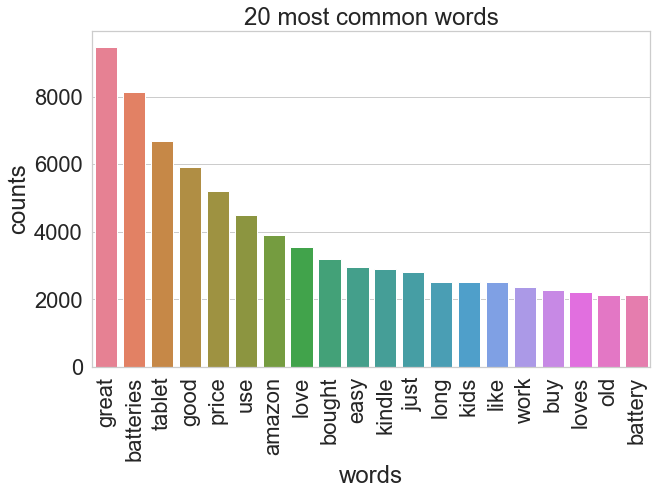

In [242]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_50_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(10, 10/1.6180))
    plt.subplot(title='20 most common words')
    sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['text'].values.astype('U'))
# Visualise the 10 most common words
plot_50_most_common_words(count_data, count_vectorizer)

In [72]:

def df2idf(docfreq, totaldocs, log_base=2.0, add=0.0):
    """
    Compute default inverse-document-frequency for a term with document frequency `doc_freq`::

      idf = add + log(totaldocs / doc_freq)
    """
    return add + math.log(1.0 * totaldocs / docfreq, log_base)

In [74]:
mydict = corpora.Dictionary([simple_preprocess(words) for words in X_train])
corpus = [mydict.doc2bow(simple_preprocess(words)) for words in X_train]

from gensim import corpora, models
tfidf = models.TfidfModel(corpus=corpus, id2word= None, 
                          dictionary=None,normalize=True, smartirs= 'lfc', 
                          pivot=None, slope=0.25)
corpus_tfidf4 = tfidf[corpus]
from pprint import pprint
for doc in corpus_tfidf4:
    pprint(doc)
    break

[(0, 0.19915931251733512),
 (1, 0.2658964902580722),
 (2, 0.08493540269058628),
 (3, 0.16442367367844385),
 (4, 0.10088892937758757),
 (5, 0.21151772612241632),
 (6, 0.21495665140305847),
 (7, 0.17436875663712906),
 (8, 0.3036309069797487),
 (9, 0.16871058172434855),
 (10, 0.18697938597125754),
 (11, 0.312297027167372),
 (12, 0.09861363561890793),
 (13, 0.09465616882390053),
 (14, 0.2827656634998114),
 (15, 0.14819674318543724),
 (16, 0.17110511089655042),
 (17, 0.17620431889991717),
 (18, 0.1995018883057888),
 (19, 0.14191970940129447),
 (20, 0.11152591867980348),
 (21, 0.17696374292895814),
 (22, 0.18928476220975704),
 (23, 0.1872288335892891),
 (24, 0.19881975505699043),
 (25, 0.2290715354808949),
 (26, 0.10516611311839322),
 (27, 0.11018077867343574)]


In [75]:
lda_model_tfidf3 = gensim.models.LdaMulticore(corpus_tfidf4, num_topics=10, id2word=mydict, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.026*"great" + 0.025*"price" + 0.023*"batteries" + 0.016*"deal" + 0.014*"work" + 0.013*"good" + 0.011*"name" + 0.010*"last" + 0.010*"long" + 0.010*"brand"
Topic: 1 Word: 0.009*"it" + 0.009*"old" + 0.008*"loves" + 0.008*"year" + 0.008*"easy" + 0.006*"tablet" + 0.006*"my" + 0.006*"kindle" + 0.006*"use" + 0.006*"bought"
Topic: 2 Word: 0.014*"works" + 0.009*"great" + 0.009*"tablet" + 0.009*"it" + 0.008*"loves" + 0.008*"easy" + 0.008*"use" + 0.007*"gift" + 0.007*"love" + 0.007*"kids"
Topic: 3 Word: 0.018*"work" + 0.016*"buy" + 0.013*"good" + 0.011*"batteries" + 0.010*"price" + 0.010*"great" + 0.009*"fine" + 0.008*"battery" + 0.008*"again" + 0.006*"perfect"
Topic: 4 Word: 0.010*"love" + 0.010*"long" + 0.009*"batteries" + 0.008*"ok" + 0.008*"last" + 0.008*"it" + 0.006*"tablet" + 0.006*"loves" + 0.006*"bought" + 0.006*"use"
Topic: 5 Word: 0.011*"worked" + 0.010*"quality" + 0.006*"batteries" + 0.006*"good" + 0.006*"well" + 0.006*"price" + 0.005*"great" + 0.005*"tablet" + 0.004*"

In [76]:
ldamodel3 = LdaModel(corpus=corpus_tfidf4, num_topics=5, id2word=mydict)
ldamodel.print_topics(20,num_words=50)

[(0,
  '0.007*"amazon" + 0.005*"works" + 0.005*"best" + 0.005*"batteries" + 0.004*"good" + 0.004*"tablet" + 0.004*"prime" + 0.004*"price" + 0.004*"sound" + 0.004*"get" + 0.004*"great" + 0.004*"the" + 0.004*"well" + 0.003*"complaints" + 0.003*"what" + 0.003*"use" + 0.003*"issues" + 0.003*"always" + 0.003*"inexpensive" + 0.003*"buy" + 0.003*"basic" + 0.003*"it" + 0.003*"like" + 0.003*"one" + 0.003*"this" + 0.003*"would" + 0.003*"no" + 0.003*"better" + 0.003*"device" + 0.003*"say" + 0.003*"need" + 0.003*"alexa" + 0.003*"member" + 0.003*"store" + 0.003*"priced" + 0.003*"long" + 0.002*"used" + 0.002*"apps" + 0.002*"browsing" + 0.002*"power" + 0.002*"ordering" + 0.002*"if" + 0.002*"love" + 0.002*"ask" + 0.002*"worth" + 0.002*"market" + 0.002*"bad" + 0.002*"trips" + 0.002*"dont" + 0.002*"much"'),
 (1,
  '0.013*"it" + 0.012*"tablet" + 0.011*"loves" + 0.010*"love" + 0.010*"easy" + 0.009*"bought" + 0.009*"old" + 0.008*"kindle" + 0.008*"use" + 0.008*"my" + 0.007*"kids" + 0.007*"this" + 0.007*"yea

In [77]:
pyLDAvis.gensim.prepare(ldamodel3, corpus_tfidf4, mydict)

C:\Users\raghu\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.144816  0.037525       1        1  32.374191
2      0.141562  0.033868       2        1  22.128401
3     -0.108307 -0.033726       3        1  17.423990
0      0.051773  0.094951       4        1  16.248999
4      0.059788 -0.132618       5        1  11.824422, topic_info=     Category        Freq       Term       Total  loglift  logprob
32    Default  757.000000      great  757.000000  30.0000  30.0000
3     Default  619.000000  batteries  619.000000  29.0000  29.0000
37    Default  544.000000      price  544.000000  28.0000  28.0000
31    Default  663.000000       good  663.000000  27.0000  27.0000
58    Default  187.000000       deal  187.000000  26.0000  26.0000
12    Default  268.000000       last  268.000000  25.0000  25.0000
311   Default  297.000000    product  297.000000  24.0000  24.0000
189   Default  275.000000      value  275.000000  23.0000  23.0000
87    Default  334.000000       work  334.000000  22.0000  22.0000
188   Default  173.000000       name  173.000000  21.0000  21.0000
186   Default  172.000000  excellent  172.000000  20.0000  20.0000
185   Default  179.000000      brand  179.000000  19.0000  19.0000
50    Default  262.000000      works  262.000000  18.0000  18.0000
13    Default  279.000000       long  279.000000  17.0000  17.0000
159   Default  269.000000      loves  269.000000  16.0000  16.0000
192   Default  126.000000     brands  126.000000  15.0000  15.0000
184   Default  197.000000    quality  197.000000  14.0000  14.0000
20    Default  183.000000      these  183.000000  13.0000  13.0000
236   Default   81.000000         ok   81.000000  12.0000  12.0000
297   Default  103.000000    awesome  103.000000  11.0000  11.0000
4     Default  251.000000        buy  251.000000  10.0000  10.0000
1202  Default   54.000000     thanks   54.000000   9.0000   9.0000
211   Default  258.000000       they  258.000000   8.0000   8.0000
685   Default   71.000000       will   71.000000   7.0000   7.0000
154   Default  142.000000        she  142.000000   6.0000   6.0000
309   Default  102.000000      again  102.000000   5.0000   5.0000
364   Default  139.000000       seem  139.000000   4.0000   4.0000
208   Default  143.000000  recommend  143.000000   3.0000   3.0000
348   Default   43.000000  described   43.000000   2.0000   2.0000
28    Default  201.000000    battery  201.000000   1.0000   1.0000
...       ...         ...        ...         ...      ...      ...
31     Topic5  182.248718       good  663.994507   0.8421  -3.6822
1311   Topic5   13.749644       hope   17.836624   1.8748  -6.2666
1269   Topic5   16.967457    perform   24.906624   1.7512  -6.0563
938    Topic5   16.584349     market   24.219130   1.7563  -6.0791
184    Topic5   58.871403    quality  197.050781   0.9269  -4.8122
3      Topic5  108.055939  batteries  619.061279   0.3894  -4.2049
206    Topic5   25.178432    pleased   53.450455   1.3822  -5.6616
892    Topic5   21.311228       else   40.580524   1.4909  -5.8283
1203   Topic5   16.206867      touch   25.428371   1.6846  -6.1021
527    Topic5   24.457285       know   58.983643   1.2547  -5.6906
923    Topic5   16.786674      mouse   28.559273   1.6036  -6.0670
37     Topic5   61.119499      price  544.653625  -0.0523  -4.7747
59     Topic5   20.737040     decent   47.135162   1.3139  -5.8556
14     Topic5   27.407675      money  101.019974   0.8305  -5.5767
133    Topic5   28.911860       very  148.917709   0.4959  -5.5233
214    Topic5   18.596748        yet   48.010376   1.1866  -5.9646
861    Topic5   16.652861      point   32.802048   1.4571  -6.0750
2      Topic5   24.984934     amazon  257.978149  -0.1996  -5.6693
45     Topic5   22.084812       best  158.419601   0.1646  -5.7927
211    Topic5   23.967236       they  258.044983  -0.2414  -5.7109
46     Topic5   25.199327       love  352.877747  -0.5043  -5.6608
99     Topic5   23.011259   

In [80]:
lsimodel3 = LsiModel(corpus=corpus_tfidf4, num_topics=5, id2word=mydict)
lsimodel3.print_topics(20,num_words=50)

[(0,
  '0.483*"great" + 0.405*"good" + 0.400*"price" + 0.329*"batteries" + 0.155*"work" + 0.143*"value" + 0.142*"product" + 0.106*"long" + 0.100*"tablet" + 0.098*"it" + 0.098*"last" + 0.094*"they" + 0.092*"buy" + 0.091*"deal" + 0.087*"quality" + 0.083*"works" + 0.083*"well" + 0.083*"love" + 0.078*"use" + 0.069*"name" + 0.068*"these" + 0.068*"amazon" + 0.067*"easy" + 0.065*"brand" + 0.065*"battery" + 0.062*"kids" + 0.060*"this" + 0.058*"the" + 0.056*"bought" + 0.056*"loves" + 0.055*"far" + 0.053*"seem" + 0.052*"time" + 0.050*"like" + 0.049*"brands" + 0.048*"would" + 0.046*"excellent" + 0.044*"old" + 0.044*"nice" + 0.043*"my" + 0.043*"better" + 0.043*"kindle" + 0.042*"one" + 0.040*"year" + 0.040*"really" + 0.039*"fire" + 0.039*"much" + 0.038*"very" + 0.038*"recommend" + 0.037*"best"'),
 (1,
  '-0.654*"good" + 0.288*"great" + 0.209*"it" + 0.176*"loves" + -0.172*"batteries" + 0.169*"tablet" + 0.161*"love" + 0.144*"easy" + 0.131*"use" + 0.122*"old" + 0.118*"bought" + 0.117*"my" + 0.106*"yea

In [ ]:
import operator
def ret_top_model():
    """
    Since LDAmodel is a probabilistic model, it comes up different topics each time we run it. To control the
    quality of the topic model we produce, we can see what the interpretability of the best topic is and keep
    evaluating the topic model until this threshold is crossed. 
    
    Returns:
    -------
    lm: Final evaluated topic model
    top_topics: ranked topics in decreasing order. List of tuples
    """
    top_topics = [(0, 0)]
    while top_topics[0][1] < 0.97:
        lm = LdaModel(corpus=corpus, id2word=mydict)
        coherence_values = {}
        for n, topic in lm.show_topics(num_topics=10, formatted=False):
            topic = [word for word, _ in topic]
            cm = CoherenceModel(topics=[topic], texts=corpus, dictionary=mydict, window_size=10)
            coherence_values[n] = cm.get_coherence()
        top_topics = sorted(coherence_values.items(), key=operator.itemgetter(1), reverse=True)
    return lm, top_topics

In [ ]:
lm, top_topics = ret_top_model()

In [ ]:
pprint([lm.show_topic(topicid) for topicid, c_v in top_topics[:10]])

In [ ]:
pyLDAvis.gensim.prepare(lda_model_tfidf, corpus_tfidf, mydict)

<>:3: DeprecationWarning: invalid escape sequence \A
<>:3: DeprecationWarning: invalid escape sequence \A
<>:3: DeprecationWarning: invalid escape sequence \A
<ipython-input-105-d8401602b6c5>:3: DeprecationWarning: invalid escape sequence \A
  df = pd.read_excel('D:\Amazon_review_pol_195.xlsx',header = None, names = cols)
C:\Users\raghu\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\raghu\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\raghu\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The html argument of XMLParser() is deprecated
  _XMLParser.__init__(self, html, target, encoding)
C:\Users\raghu\Anaconda3\lib\site-packages\defusedxml\ElementTree.py:68: DeprecationWarning: The htm

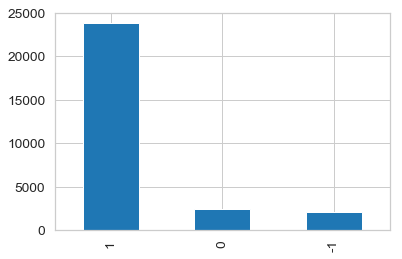

In [105]:
import pandas as pd
cols = ['sentiment','text']
df = pd.read_excel('D:\Amazon_review_pol_195.xlsx',header = None, names = cols)
df.head(20)
#import numpy as np
df['sentiment'].value_counts().plot(kind='bar')

In [106]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size

6.0
4.0


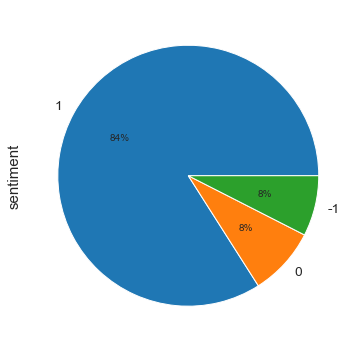

In [107]:
df['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%')

In [215]:
dfp = df[df['sentiment'] == 1]
dfn = df[df['sentiment'] == -1]
dfp.columns = ['postive','text']
dfp.head()

,postive,text
2,1,Well they are not Duracell but for the price i...
3,1,Seem to work as well as name brand batteries a...
4,1,These batteries are very long lasting the pric...
5,1,Bought a lot of batteries for Christmas and th...
6,1,ive not had any problame with these batteries ...


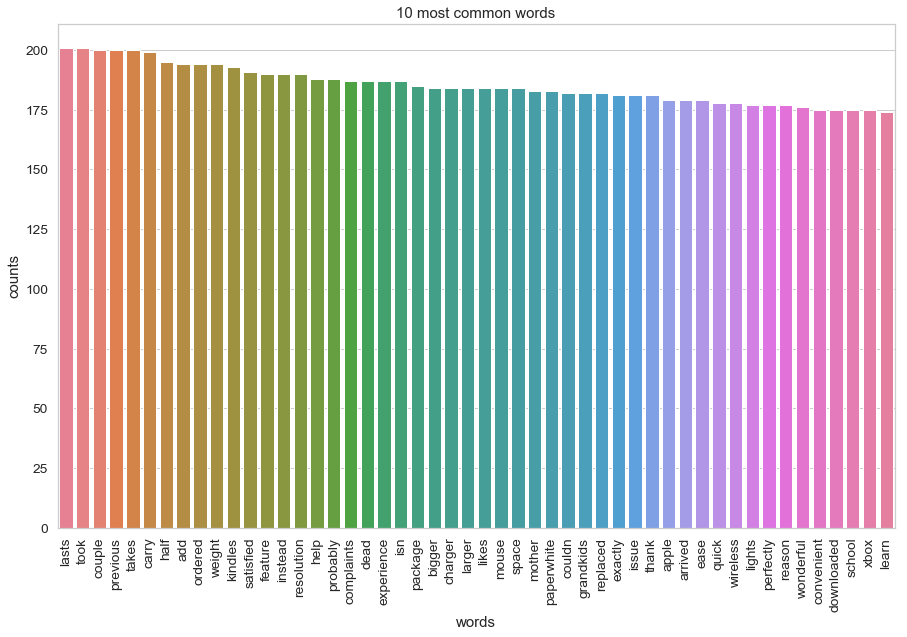

In [229]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# Helper function
def plot_50_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[300:350]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')
# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['text'].values.astype('U'))
# Visualise the 10 most common words
plot_50_most_common_words(count_data, count_vectorizer)

In [127]:
# print(df['sentiment'].filter('-1')[:50])
# print(df)
# print(df['sentiment'].filter('-1'))
print(df[df['sentiment'] == -1][:50])

     sentiment                                               text
0           -1  I order 3 of them and one of the item is bad q...
1           -1  Bulk is always the less expensive way to go fo...
8           -1  These do not hold the amount of high power jui...
16          -1  I don't know if I would buy thus brand again s...
19          -1  Bought these batteries for my Christmas gifts ...
22          -1  They last as long as Duracell batteries in my ...
23          -1  they seemed to not last as long as other name ...
38          -1   These last as well as Energizer- half the price.
39          -1  These batteries are horrible. We depend on AA ...
42          -1  I put these batteries in 10 of the 12 window c...
54          -1  Arrived earlier than expected. Amazon batterie...
74          -1  Sorry to say I've been disappointed with these...
77          -1                     lasts just as long as duracell
92          -1  I got tired of running back and forth to the l...
102       

In [188]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer()
cvec.fit_transform(df['text'].dropna().values.astype('U'))
# tfidf = TfidfVectorizer()
# tfidf.fit_transform(df['tweet'].dropna().values.astype('U'))

<28332x10361 sparse matrix of type '<class 'numpy.int64'>'
	with 572954 stored elements in Compressed Sparse Row format>

In [205]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(lowercase = False)
cvec.fit(df['text'].dropna().values.astype('U'))

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=False, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [197]:
len(cvec.get_feature_names())

13002

In [203]:
df.sentiment.value_counts()

 1    23805
 0     2402
-1     2125
Name: sentiment, dtype: int64

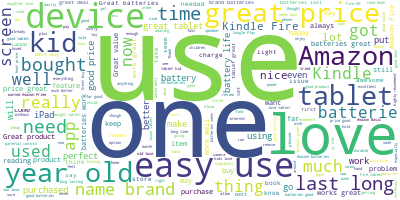

In [219]:
df['text'] = df['text'].astype(str)
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df['text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [153]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\raghu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [155]:
example_review = df.iloc[0]
example_review

sentiment                                                   -1
text         I order 3 of them and one of the item is bad q...
Name: 0, dtype: object

In [156]:
import nltk
print (nltk.word_tokenize(example_review['text']))

['I', 'order', '3', 'of', 'them', 'and', 'one', 'of', 'the', 'item', 'is', 'bad', 'quality', '.', 'Is', 'missing', 'backup', 'spring', 'so', 'I', 'have', 'to', 'put', 'a', 'pcs', 'of', 'aluminum', 'to', 'make', 'the', 'battery', 'work', '.']


In [170]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\raghu\AppData\Roaming\nltk_data...


True

In [184]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()
vader.polarity_scores(df['text'][1])

{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'compound': 0.3612}